# Stock Analysis

### Author : 钟智强

#### Objectives
The main objectives of this analysis are:
1. **Data Collection**: Gather historical stock price data for Stocks from a reliable financial data source.
2. **Exploratory Data Analysis (EDA)**: Conduct a thorough exploratory data analysis to understand the trends, patterns, and anomalies in  stock prices.
3. **Technical Analysis**: Apply various technical indicators and charting techniques to identify potential trading signals and trends.
4. **Statistical Analysis**: Perform statistical tests and analyses to assess the stock's performance and volatility.
5. **Predictive Modeling**: Develop predictive models to forecast future stock prices based on historical data.
6. **Sentiment Analysis**: Analyze market sentiment related to Stocks by incorporating news and social media data.



1. Get Stocks Information and Price

> Import dependencies

In [104]:
import os
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from datetime import datetime
from textblob import TextBlob
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

nvidia = yf.Ticker("NVDA")
intel = yf.Ticker("INTC")
meta = yf.Ticker("META")
tme = yf.Ticker("TME")

nvidia_stock_data = nvidia.history(period="1d")
intel_stock_data = intel.history(period="1d")
meta_stock_data = meta.history(period="1d")
tme_stock_data = tme.history(period="1d")

2. Display latest Stock table

In [105]:
current_price = nvidia_stock_data["Close"][0]
open_price = nvidia_stock_data["Open"][0]
high_price = nvidia_stock_data["High"][0]
low_price = nvidia_stock_data["Low"][0]
volume = nvidia_stock_data["Volume"][0]

i_current_price = intel_stock_data["Close"][0]
i_open_price = intel_stock_data["Open"][0]
i_high_price = intel_stock_data["High"][0]
i_low_price = intel_stock_data["Low"][0]
i_volume = intel_stock_data["Volume"][0]

m_current_price = meta_stock_data["Close"][0]
m_open_price = meta_stock_data["Open"][0]
m_high_price = meta_stock_data["High"][0]
m_low_price = meta_stock_data["Low"][0]
m_volume = meta_stock_data["Volume"][0]

t_current_price = tme_stock_data["Close"][0]
t_open_price = tme_stock_data["Open"][0]
t_high_price = tme_stock_data["High"][0]
t_low_price = tme_stock_data["Low"][0]
t_volume = tme_stock_data["Volume"][0]

# Combine data into a single DataFrame
combined_stock_data = {
    "Datetime": current_datetime,
    "Stock Ticker": ["NVDA", "INTC", "META", "TME"],
    "Open Price": [
        f"${open_price:.2f}",
        f"${i_open_price:.2f}",
        f"${m_open_price:.2f}",
        f"${t_open_price:.2f}",
    ],
    "High Price": [
        f"${high_price:.2f}",
        f"${i_high_price:.2f}",
        f"${m_high_price:.2f}",
        f"${t_high_price:.2f}",
    ],
    "Low Price": [
        f"${low_price:.2f}",
        f"${i_low_price:.2f}",
        f"${m_low_price:.2f}",
        f"${t_low_price:.2f}",
    ],
    "Current Price": [
        f"${current_price:.2f}",
        f"${i_current_price:.2f}",
        f"${m_current_price:.2f}",
        f"${t_current_price:.2f}",
    ],
    "Volume": [volume, i_volume, m_volume, t_volume],
}

# Create a DataFrame
df = pd.DataFrame(combined_stock_data)

# Display the DataFrame
display(df)

,Datetime,Stock Ticker,Open Price,High Price,Low Price,Current Price,Volume
0,2024-07-06 00:13:34,NVDA,$127.36,$128.85,$125.68,$127.60,112129394
1,2024-07-06 00:13:34,INTC,$31.40,$32.34,$31.31,$32.19,18906098
2,2024-07-06 00:13:34,META,$512.00,$535.66,$511.61,$529.29,10479905
3,2024-07-06 00:13:34,TME,$14.75,$14.98,$14.61,$14.65,3608602


3. Download Datasets

In [106]:
ticker = "LMT" # Change this Accordingly

download = False

stock_data = yf.download(ticker, start="2024-05-01", end="2024-07-05")

display(stock_data)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-01,462.609985,465.399994,460.559998,461.730011,458.637665,994700
2024-05-02,461.100006,463.600006,459.000000,463.200012,460.097839,1011400
2024-05-03,462.929993,462.929993,457.170013,461.910004,458.816467,910700
2024-05-06,463.160004,463.500000,460.179993,462.779999,459.680634,796300
2024-05-07,464.000000,466.809998,463.160004,466.679993,463.554504,723400
2024-05-08,467.500000,468.000000,463.779999,466.160004,463.037994,599000
2024-05-09,466.079987,468.760010,465.209991,468.390015,465.253082,594800
2024-05-10,469.000000,470.619995,467.980011,468.880005,465.739777,482500
2024-05-13,469.880005,472.350006,469.500000,470.559998,467.408508,634300


4. Process downloaded datasets

In [107]:
stock_data["Date"] = stock_data.index
stock_data["Day"] = stock_data["Date"].apply(lambda x: x.day)
stock_data["Month"] = stock_data["Date"].apply(lambda x: x.month)
stock_data["Year"] = stock_data["Date"].apply(lambda x: x.year)

features = stock_data[["Day", "Month", "Year"]]
target = stock_data["Close"]

# Split Data

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.5, random_state=42
)

5. Train Model

### Linear Regression Model

Linear regression is utilized to model the relationship between independent variables (features) and the dependent variable (target, in this case, stock prices). The formula for a simple linear regression can be represented as:

$$
\hat{y} = b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 + \ldots + b_n \cdot x_n
$$
- **Variables**:
  - \(\hat{y}\): Predicted value (predicted stock price).
  - \(b_0, b_1, \ldots, b_n\): Coefficients determined during model training.
  - \(x_1, x_2, \ldots, x_n\): Input features (day, month, year).

### Mean Squared Error (MSE)

Mean Squared Error measures the average squared difference between predicted values and actual values:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- **Variables**:
  - \(y_i\): Actual values.
  - \(\hat{y}_i\): Predicted values.
  - \(n\): Number of samples.


In [108]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [109]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

display(f"Mean Squared Error: {mse}")

'Mean Squared Error: 21.063824799584527'

6. Visualise the predicted Data.

Data visualization is achieved using Matplotlib to plot actual and predicted stock prices over time:

- **Matplotlib**: Python library for plotting.
- **Subplots**: `plt.subplots(2, 1)` creates two vertically stacked subplots.
- **Plotting**: `ax[0].plot()` and `ax[1].plot()` are used to plot actual and predicted prices, with various styling options (`color`, `alpha`, `linestyle`, `legend`, `grid`) applied for clarity.

### Data Collection and Preparation

- Historical stock price data is fetched using `yfinance` for stocks such as Nvidia (`NVDA`), Intel (`INTC`), Meta (`META`), and Tencent Music (`TME`).
- Data is processed (`DataFrame` manipulation) to extract features (`Day`, `Month`, `Year`) and the target variable (`Close` price).


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

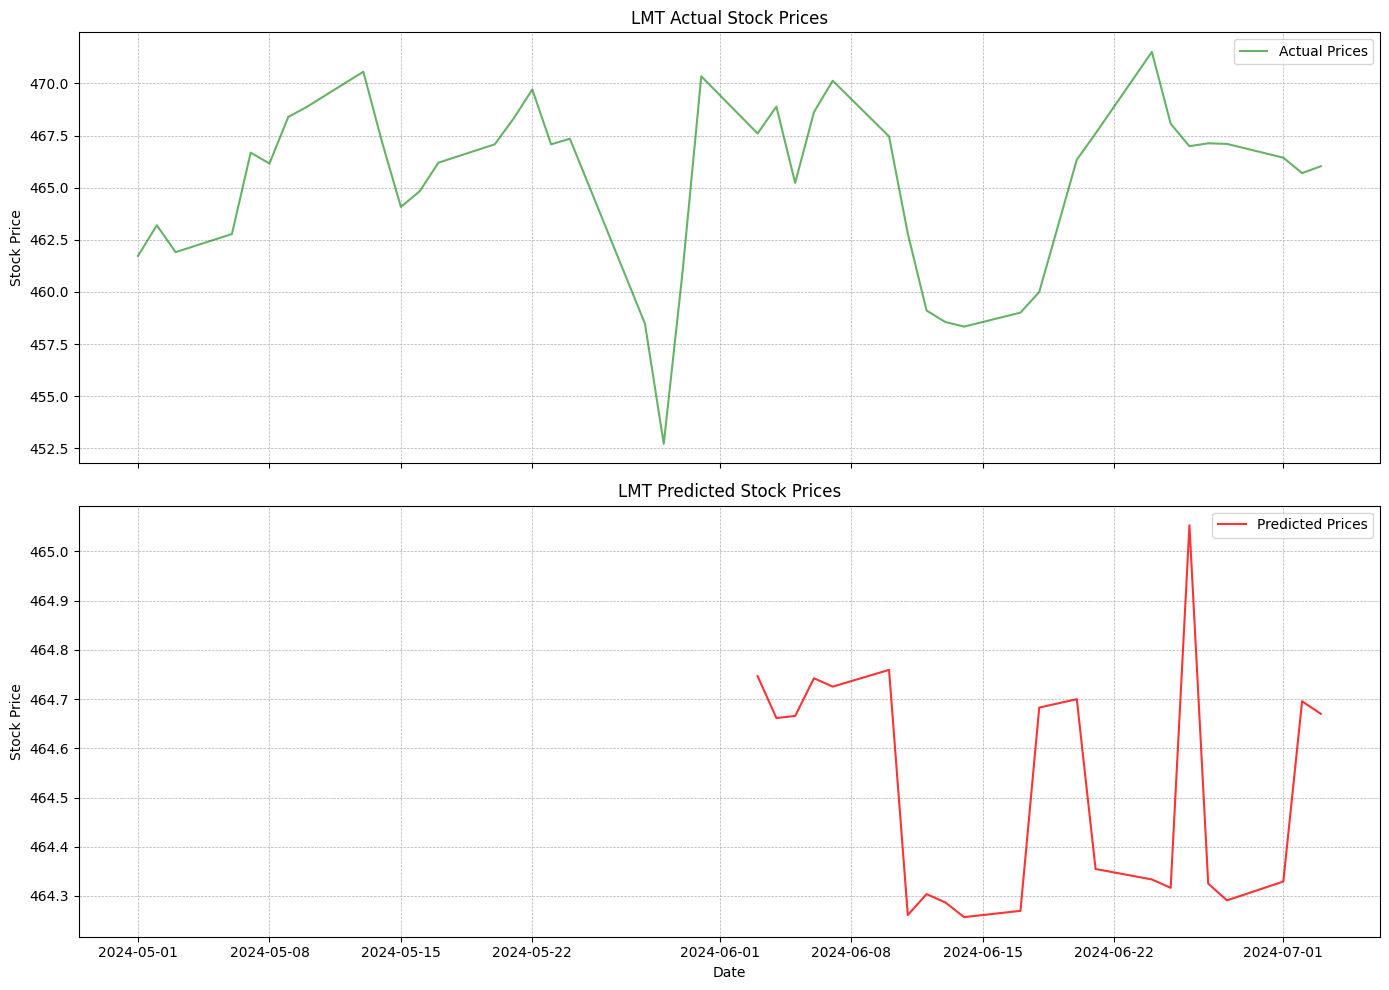

In [110]:
from matplotlib.dates import DateFormatter

# Create a new DataFrame to hold the dates and predictions
pred_df = pd.DataFrame(
    {
        "Date": stock_data["Date"][len(stock_data) - len(predictions) :],
        "Predicted": predictions,
    }
)

# Set up the subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot actual prices
ax[0].plot(
    stock_data["Date"],
    stock_data["Close"],
    label="Actual Prices",
    color="green",
    alpha=0.6,
)
ax[0].set_ylabel("Stock Price")
ax[0].set_title(f"{ticker} Actual Stock Prices")
ax[0].legend()
ax[0].grid(True, which="both", linestyle="--", linewidth=0.5)

ax[1].plot(
    pred_df["Date"],
    pred_df["Predicted"],
    label="Predicted Prices",
    color="red",
    linestyle="-",
    alpha=0.8,
)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Stock Price")
ax[1].set_title(f"{ticker} Predicted Stock Prices")
ax[1].legend()
ax[1].grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()

display(plt)

Output Current Price of selected Stock to csv

In [111]:
if download: md_data = stock_data.to_csv(f"output/{ticker}_Price-{current_datetime}", index=False) 

Calculate Moving Averages

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

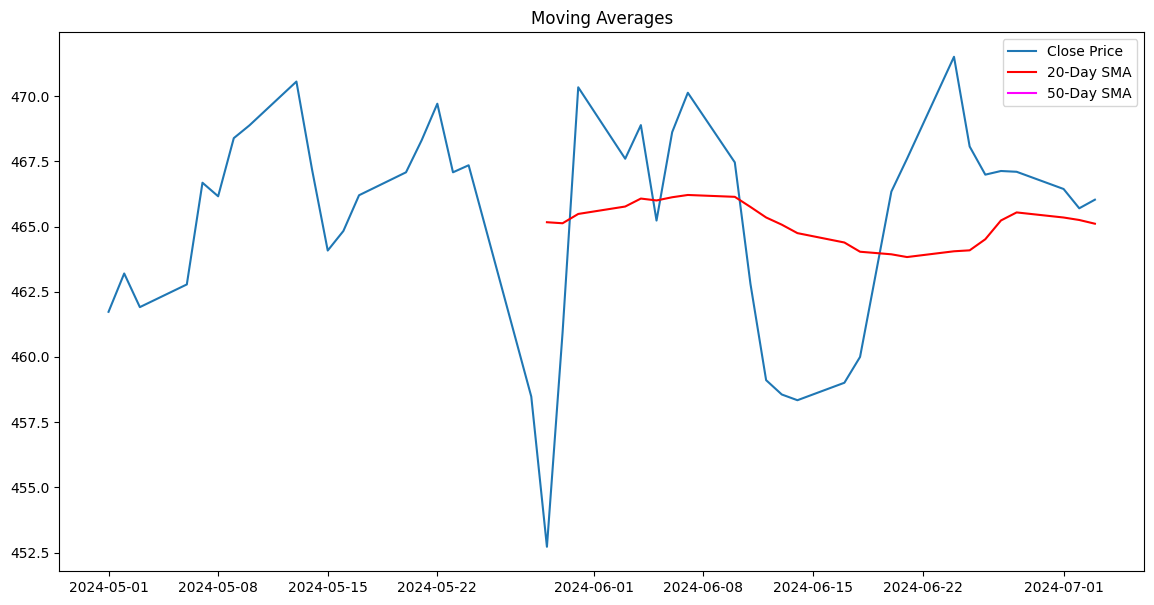

In [112]:
# Calculate Moving Averages
stock_data["20_SMA"] = stock_data["Close"].rolling(window=20).mean()
stock_data["50_SMA"] = stock_data["Close"].rolling(window=50).mean()

# Plot Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data["Close"], label="Close Price")
plt.plot(stock_data["20_SMA"], label="20-Day SMA", color="red")
plt.plot(stock_data["50_SMA"], label="50-Day SMA", color="magenta")
plt.title("Moving Averages")
plt.legend()

display(plt)

7. Market Sentiment Analysis

Gather comprehensive news and updates about the stock market, conduct in-depth analysis, and provide detailed insights and forecasts.

In [113]:
def fetch_stock_news(ticker):
    url = f"https://newsapi.org/v2/everything?q={ticker}&apiKey=c27ac3ff5baa4f36abd7d6d90110da55"
    response = requests.get(url)

    if response.status_code == 200:
        news_data = response.json()
        if 'articles' in news_data:
            return news_data["articles"]
        else:
            print(f"No articles found for {ticker}. News data structure:\n{news_data}")
            return []
    else:
        print(f"Failed to fetch news for {ticker}. Status code: {response.status_code}")
        return []

def sentiment_text(value):
    match value:
        case value if value < 0:
            return "Negative"
        case value if value == 0:
            return "Neutral"
        case value if value > 0:
            return "Positive"


# Analyze sentiment
def analyze_sentiment(articles):
    sentiment_scores = []
    for article in articles:
        title = article.get("title", "") or ""
        description = article.get("description", "") or ""
        text = title + " " + description
        sentiment = TextBlob(text).sentiment.polarity
        sentiment_scores.append(sentiment)
    return sentiment_scores


articles = fetch_stock_news(ticker)

if articles:
    sentiment_scores = analyze_sentiment(articles)
    average_sentiment = np.mean(sentiment_scores)
    sentiment_score_text = sentiment_text(average_sentiment)
    
    # Display sentiment summary
    print(f"{ticker}: Average Sentiment: {average_sentiment} | {sentiment_score_text}")
    
    # Prepare articles for display in a table
    article_data = []
    for article in articles:
        article_data.append(
            {
                "Article Title": article.get("title", "N/A"),
                "Article Description": article.get("description", "N/A"),
                "Article URL": article.get("url", "N/A"),
            }
        )
    
    # Create a DataFrame and display it
    df_articles = pd.DataFrame(article_data)
    top_10_articles = df_articles.head(10)
    display(top_10_articles)

    # Optional: Download and save to CS
    if download:
        # Save the top 10 articles to a CSV file
        top_10_articles.to_csv("output/top_10_articles.csv", index=False)

        # Read the CSV file back into a DataFrame
        read_df = pd.read_csv("output/top_10_articles.csv")
        display(read_df)

        # Convert DataFrame to Markdown format
        markdown_table = read_df.to_markdown(index=False)

        # Save the Markdown table to a .md file
        current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        file_name = f"output/Top_news_affected_{ticker}_{current_datetime}.md"

        with open(file_name, "w") as f:
            f.write(markdown_table)

    # Display the original DataFrame
    display(df_articles)
else:
    print(f"No articles found for {ticker}. Check your API key or ticker symbol.")

LMT: Average Sentiment: 0.14094684806466415 | Positive


,Article Title,Article Description,Article URL
0,Lockheed (LMT) Clinches a $4.5B Contract for P...,None,https://consent.yahoo.com/v2/collectConsent?se...
1,Summer officially arrives with the earliest so...,Astronomical summer officially arrives in the ...,https://www.npr.org/2024/06/20/nx-s1-5013295/s...
2,Lockheed Martin to buy up to 25 rocket launche...,Texas-based Firefly makes small and medium lau...,https://finance.yahoo.com/news/lockheed-martin...
3,Northrop (NOC) Wins a Deal to Aid Its E-2D Adv...,Northrop (NOC) is set to provide continued fab...,https://finance.yahoo.com/news/northrop-noc-wi...
4,Nvidia's One-Day Loss Exceeds The Value Of 85%...,Think you had a bad day?,https://www.investors.com/etfs-and-funds/secto...
5,Apple Is Working On Removable Battery For iPho...,Apple is working on a new technology that coul...,https://techviral.net/apple-is-working-on-remo...
6,GA-ASI and Lockheed Martin Developing Net-Enab...,SAN DIEGO – 27 June 2024 – General Atomics Aer...,https://soldiersystems.net/2024/06/28/ga-asi-a...
7,Centre imposes stock limit on wheat to curb ho...,Centre has imposed a stockholding limit on whe...,https://www.business-standard.com/economy/news...
8,Buy Lockheed Martin (LMT) stock as bullish cat...,2024-06-12 03:33:34 ET Lockheed Mart...,https://www.investorsobserver.com/news/qm-news...
9,"Deadpool, Spider-Man, TMNT & MMPR Diamond Excl...",As well as whatever the Absolute Universe Ashc...,https://bleedingcool.com/comics/deadpool-spide...


,Article Title,Article Description,Article URL
0,Lockheed (LMT) Clinches a $4.5B Contract for P...,NaN,https://consent.yahoo.com/v2/collectConsent?se...
1,Summer officially arrives with the earliest so...,Astronomical summer officially arrives in the ...,https://www.npr.org/2024/06/20/nx-s1-5013295/s...
2,Lockheed Martin to buy up to 25 rocket launche...,Texas-based Firefly makes small and medium lau...,https://finance.yahoo.com/news/lockheed-martin...
3,Northrop (NOC) Wins a Deal to Aid Its E-2D Adv...,Northrop (NOC) is set to provide continued fab...,https://finance.yahoo.com/news/northrop-noc-wi...
4,Nvidia's One-Day Loss Exceeds The Value Of 85%...,Think you had a bad day?,https://www.investors.com/etfs-and-funds/secto...
5,Apple Is Working On Removable Battery For iPho...,Apple is working on a new technology that coul...,https://techviral.net/apple-is-working-on-remo...
6,GA-ASI and Lockheed Martin Developing Net-Enab...,SAN DIEGO – 27 June 2024 – General Atomics Aer...,https://soldiersystems.net/2024/06/28/ga-asi-a...
7,Centre imposes stock limit on wheat to curb ho...,Centre has imposed a stockholding limit on whe...,https://www.business-standard.com/economy/news...
8,Buy Lockheed Martin (LMT) stock as bullish cat...,2024-06-12 03:33:34 ET Lockheed Mart...,https://www.investorsobserver.com/news/qm-news...
9,"Deadpool, Spider-Man, TMNT & MMPR Diamond Excl...",As well as whatever the Absolute Universe Ashc...,https://bleedingcool.com/comics/deadpool-spide...


,Article Title,Article Description,Article URL
0,Lockheed (LMT) Clinches a $4.5B Contract for P...,None,https://consent.yahoo.com/v2/collectConsent?se...
1,Summer officially arrives with the earliest so...,Astronomical summer officially arrives in the ...,https://www.npr.org/2024/06/20/nx-s1-5013295/s...
2,Lockheed Martin to buy up to 25 rocket launche...,Texas-based Firefly makes small and medium lau...,https://finance.yahoo.com/news/lockheed-martin...
3,Northrop (NOC) Wins a Deal to Aid Its E-2D Adv...,Northrop (NOC) is set to provide continued fab...,https://finance.yahoo.com/news/northrop-noc-wi...
4,Nvidia's One-Day Loss Exceeds The Value Of 85%...,Think you had a bad day?,https://www.investors.com/etfs-and-funds/secto...
...,...,...,...
82,Osman Zeki Korkmaz: Süper Lig'de şampiyonluk y...,Trendyol Süper Lig'de 2023-2024 sezonunu 20. v...,https://www.sabah.com.tr/spor/futbol/2024/06/1...
83,7/24 para transfer işlemi FAST'ta limit 2 mily...,Merkez Bankası 7/24 para transfer işlemi olan ...,https://www.turkiyegazetesi.com.tr/ekonomi/724...
84,Defence Electronics market is projected to gro...,Visiongain has published a new report entitled...,https://www.globenewswire.com/news-release/202...
85,New construction to bring more residential and...,New construction to bring more residential and...,https://6abc.com/post/new-construction-bring-r...


8. Simulate Trading Strategies

In [114]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
stock_data.set_index("Date", inplace=True)

# Calculate moving averages
def calculate_moving_average(data, window_size, column="Close"):
    return data[column].rolling(window=window_size).mean()


short_window = 50
long_window = 200

stock_data["Short_MA"] = calculate_moving_average(stock_data, short_window)
stock_data["Long_MA"] = calculate_moving_average(stock_data, long_window)


# Generate signals based on moving average crossover
def generate_signals(data):
    signals = pd.DataFrame(index=data.index)
    signals["Signal"] = 0.0

    # Generate buy signals: short-term crosses above long-term
    signals.loc[data["Short_MA"] > data["Long_MA"], "Signal"] = 1.0

    # Generate sell signals: short-term crosses below long-term
    signals.loc[data["Short_MA"] < data["Long_MA"], "Signal"] = -1.0

    # Calculate positions (holding -1 for sell, 1 for buy)
    signals["Position"] = signals["Signal"].diff()

    return signals


signals = generate_signals(stock_data)


# Backtest strategy
def backtest_strategy(data, signals, initial_capital=100000):
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions["Stock"] = 100 * signals["Signal"]  # Assuming buying 100 shares per trade

    portfolio = positions.multiply(data["Close"], axis=0)
    pos_diff = positions.diff()

    portfolio["Holdings"] = (positions.multiply(data["Close"], axis=0)).sum(axis=1)
    portfolio["Cash"] = (
        initial_capital
        - (pos_diff.multiply(data["Close"], axis=0)).sum(axis=1).cumsum()
    )

    portfolio["Total"] = portfolio["Holdings"] + portfolio["Cash"]
    portfolio["Returns"] = portfolio["Total"].pct_change()

    return portfolio


backtest_results = backtest_strategy(stock_data, signals)

Evaluate and Visualize Results

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

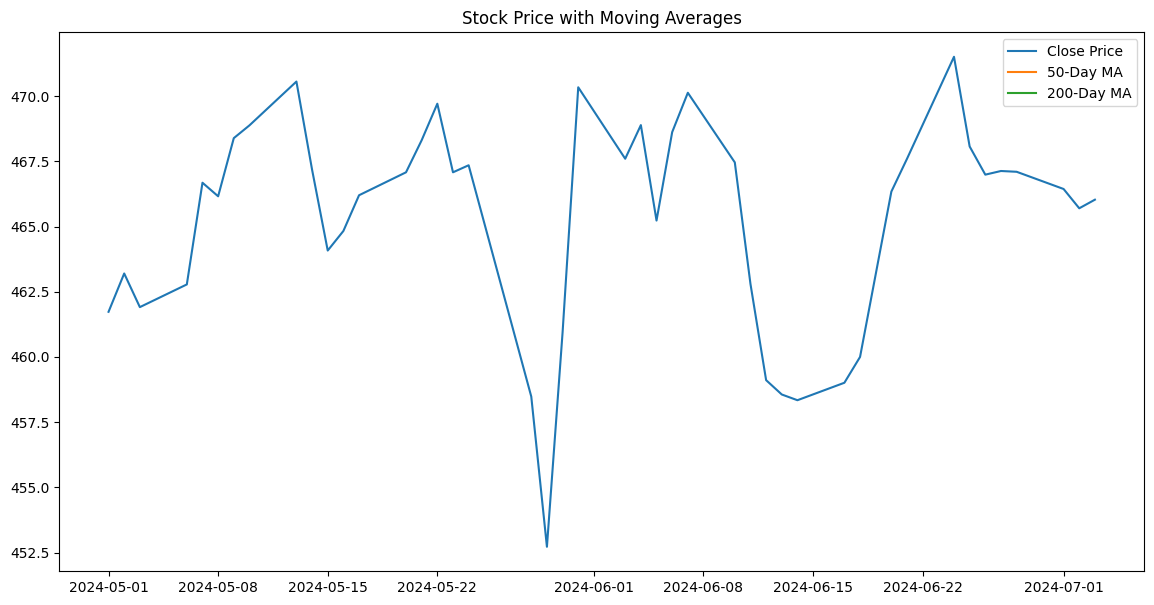

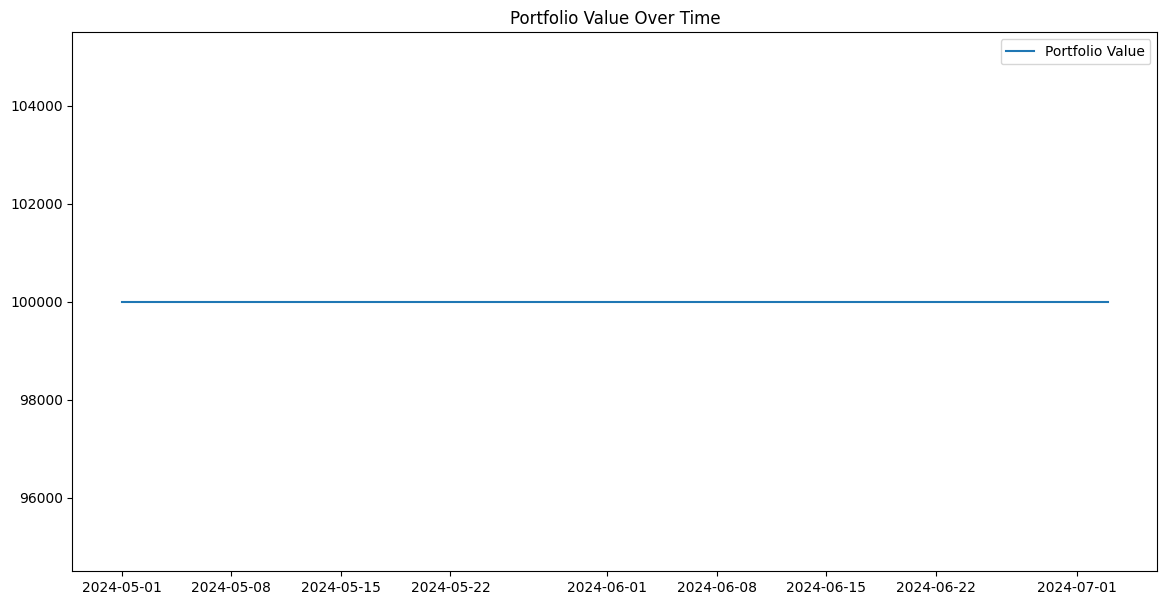

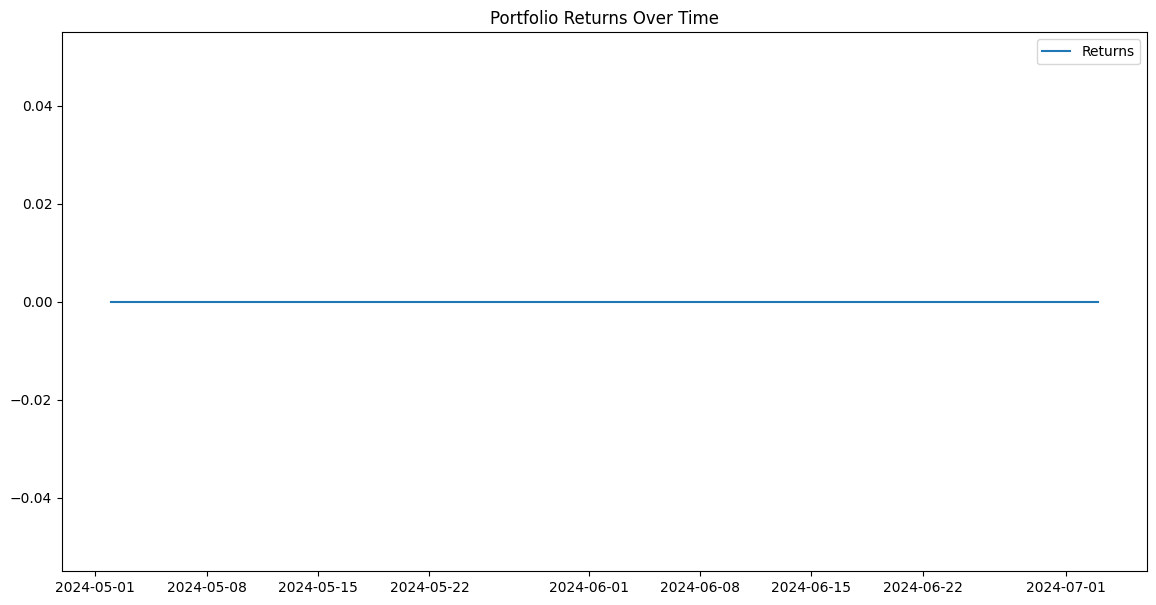

In [115]:
# Plot the stock price along with moving averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data["Close"], label="Close Price")
plt.plot(stock_data["Short_MA"], label=f"{short_window}-Day MA")
plt.plot(stock_data["Long_MA"], label=f"{long_window}-Day MA")
plt.title("Stock Price with Moving Averages")
plt.legend()


# Plot portfolio value and returns
plt.figure(figsize=(14, 7))
plt.plot(backtest_results["Total"], label="Portfolio Value")
plt.title("Portfolio Value Over Time")
plt.legend()

plt.figure(figsize=(14, 7))
plt.plot(backtest_results["Returns"], label="Returns")
plt.title("Portfolio Returns Over Time")
plt.legend()

display(plt)